In [11]:
import numpy as np
import pandas as pd
import joblib

import xgboost as xgb
from xgboost import plot_importance, plot_tree, plotting

import dtreeviz
import graphviz
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams


In [21]:
x_train = pd.read_json(r"D:\OneDrive\Documentos\LabMol\IC-Citotoxicidade\SERVIDOR CYTO SAFE\3T3\data\x_train_ecfp_fp_2_1024.json")
y_train = pd.read_json(r"D:\OneDrive\Documentos\LabMol\IC-Citotoxicidade\SERVIDOR CYTO SAFE\3T3\data\y_train_ecfp_fp_2_1024.json")
model = joblib.load(r"D:\OneDrive\Documentos\LabMol\IC-Citotoxicidade\SERVIDOR CYTO SAFE\3T3\model\xgb_classifier_ecfp_fp_2_1024.joblib")

[11:00:06] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:553: 
  If you are loading a serialized model (like pickle in Python, RDS in R) generated by
  older XGBoost, please export the model by calling `Booster.save_model` from that version
  first, then load it back in current version. See:

    https://xgboost.readthedocs.io/en/latest/tutorials/saving_model.html

  for more details about differences between saving model and serializing.



In [22]:
ar_x_train = x_train.to_numpy()
ar_y_train = y_train.to_numpy()

In [50]:
from yellowbrick.model_selection import FeatureImportances

FeatureImportances(ax=<Axes: >,
                   estimator=XGBClassifier(base_score=None, booster='gbtree',
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=0.1,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, gpu_id=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate=0.5659557757486928,
                                           max_bin=None, max_cat_threshold=None,
                                           max_cat_to_onehot=None,
                                           max_delta_step=None, max_depth=6,
                                           max_leaves=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           n_estimators=2461, n_jobs=None,
                                           num_parallel_tree=None,
                                           predictor=None, random_state=0, ...),
                   topn=10)

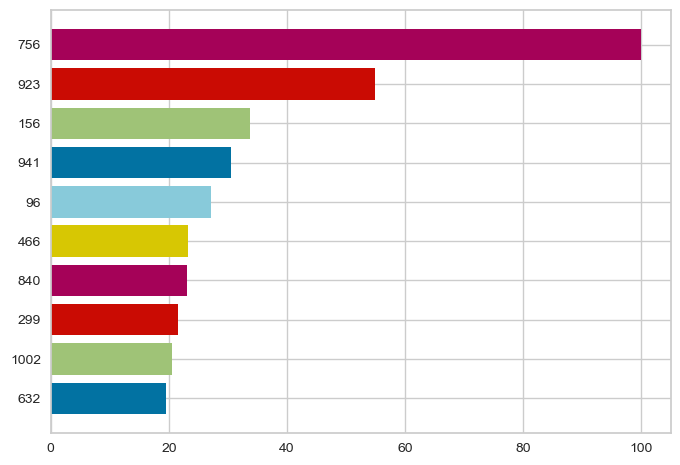

In [55]:
FeatureImportances(model, topn=10, relative=True).fit(ar_x_train, ar_y_train)

In [51]:
help(FeatureImportances)

Help on class FeatureImportances in module yellowbrick.model_selection.importances:

class FeatureImportances(yellowbrick.base.ModelVisualizer)
 |  FeatureImportances(estimator, ax=None, labels=None, relative=True, absolute=False, xlabel=None, stack=False, colors=None, colormap=None, is_fitted='auto', topn=None, **kwargs)
 |  
 |  Displays the most informative features in a model by showing a bar chart
 |  of features ranked by their importances. Although primarily a feature
 |  engineering mechanism, this visualizer requires a model that has either a
 |  ``coef_`` or ``feature_importances_`` parameter after fit.
 |  
 |  Note: Some classification models such as ``LogisticRegression``, return
 |  ``coef_`` as a multidimensional array of shape ``(n_classes, n_features)``.
 |  In this case, the ``FeatureImportances`` visualizer computes the mean of the
 |  ``coefs_`` by class for each feature.
 |  
 |  Parameters
 |  ----------
 |  estimator : Estimator
 |      A Scikit-Learn estimator t